In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd

# 1.1 Call libraries for image processing
#     Another preprocessing option is text and sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1.2, Libraries for building sequential CNN model
#      A model is composed of sequence of layered objects
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input

# 1.5 OS related
import os

# 1.6 For ROC plotting
import matplotlib.pyplot as plt

# 1.7
import numpy as np
# conda install scikit-learn
from sklearn import metrics
import time


In [197]:
#%%                            B. Define constants

# 2. Our constants
# 2.1 Dimensions to which our images will be adjusted
img_width, img_height = 250, 250

# 2.2 Data folder containing all training images, maybe in folders: cats and dogs

train_data_dir = 'D:/chest_xray/train'
test_data_dir =  'D:/chest_xray/test'

# 2.3 What is the total number of training images
#      that should be generated (not what are available)
nb_train_samples = 5216   # Actual: 1341 Normal + 3875 PNEUMONIA (more) =    5216

# 2.4 Data folder containing all validation images

validation_data_dir = 'D:/chest_xray/val'

# 2.5 What is the total no of validation samples that should
#     be generated?
nb_validation_samples = 16   # Actual: 8 + 8 =  16

# Some hyperparameters

# 2.6 Batch size to train at one go:
batch_size = 8             # No of batches = 5216/8 = 652
                            # So per epoch we have 652 batches

# 2.7 How many epochs of training?
epochs = 1                 



# 2.9 For test data, what should be batch size
test_batch_size = 16    # This is different from training batch size

# 2.10
input_shape = (img_width, img_height, 3)


In [198]:
model = Sequential()

In [199]:
model.add(Input(shape=(img_width, img_height, 3)))

In [200]:
model.add(Conv2D(filters = 128, kernel_size =3, strides = 2, padding = 'same', activation = 'relu'))

In [201]:
model.add(MaxPool2D())

In [202]:
model.add(Conv2D(filters = 64, kernel_size =3, activation = 'relu'))

In [203]:
model.add(MaxPool2D())

In [204]:
model.add(Conv2D(filters = 32, kernel_size =3, activation = 'relu'))

In [205]:
model.add(Conv2D(filters = 16, kernel_size =3, activation = 'relu'))

In [206]:
model.add(Flatten())

In [207]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 125, 125, 128)     3584      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 60, 60, 64)        73792     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 conv2d_26 (Conv2D)          (None, 26, 26, 16)       

In [208]:
model.add(Dense(1024, activation='relu'))

In [209]:
model.add(Dropout(rate = 0.4))

In [210]:
model.add(Dense(512, activation = 'relu'))

In [211]:
model.add(Dense(256, activation = 'relu'))

In [212]:
model.add(Dropout(rate = 0.2))

In [213]:
model.add(Dense(64,activation = 'relu'))

In [214]:
model.add(Dense(1,activation = 'sigmoid'))

In [215]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 125, 125, 128)     3584      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 60, 60, 64)        73792     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 conv2d_26 (Conv2D)          (None, 26, 26, 16)       

In [216]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [217]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 125, 125, 128)     3584      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 60, 60, 64)        73792     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 conv2d_26 (Conv2D)          (None, 26, 26, 16)       

In [218]:
tr_dtgen = ImageDataGenerator(
                              rescale=1. / 255,      # Normalize colour intensities in 0-1 range
                              shear_range=0.2,       # Shear varies from 0-0.2
                              zoom_range=0.2,
                              horizontal_flip=True,
                              )

In [219]:
train_generator = tr_dtgen.flow_from_directory(
                                               train_data_dir,       # Data folder of cats & dogs
                                               target_size=(img_width, img_height),  # Resize images
                                               batch_size=batch_size,  # Return images in batches
                                               class_mode='binary'   # Output labels will be 1D binary labels
                                                                     # [[1],[0],[0],[1]]
                                                                     # If 'categorical' output labels will be
                                                                     # 2D OneHotEncoded: [[1,0],[0,1],[0,1],[1,0]]
                                                                     # If 'binary' use 'sigmoid' at output
                                                                     # If 'categorical' use softmax at output

                                                )

Found 5216 images belonging to 2 classes.


In [220]:
val_dtgen = ImageDataGenerator(rescale=1. / 255)

In [221]:
validation_generator = val_dtgen.flow_from_directory(
                                                     validation_data_dir,
                                                     target_size=(img_width, img_height),   # Resize images
                                                     batch_size=2,    # batch size to augment at a time
                                                     class_mode='binary'  # Return 1D array of class labels
                                                     )

Found 16 images belonging to 2 classes.


In [222]:
start = time.time()
history = model.fit_generator(
                              # First argument is always data generator
                              generator = train_generator,
                              # How many batches per epoch?
                              # Can be any number as generator loops indefinitely
                              steps_per_epoch=nb_train_samples // batch_size,
                              # No of epochs
                              epochs=epochs,
                              # Get validation data from validation generator
                              validation_data=validation_generator,
                              verbose = 1,
                              validation_steps=nb_validation_samples // batch_size
                              )

end = time.time()
(end - start)/60  # 7min

C:\Users\311022\AppData\Local\Temp\ipykernel_68600\2386527620.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


652/652 [==============================] - 162s 246ms/step - loss: 0.5545 - acc: 0.7548 - val_loss: 0.4842 - val_acc: 0.7500


2.7063349723815917

In [223]:
result = model.evaluate(
                        validation_generator,
                        verbose = 1,
                        steps = 4        # How many batches
                        )


# 7.1.1
result     # ['loss', 'accuracy']

4/4 [==============================] - 0s 21ms/step - loss: 0.3925 - acc: 0.8750


[0.3925476372241974, 0.875]

In [224]:
pred = model.predict(validation_generator, steps = 2)

# 8.1.1
pred[:5]


2/2 [==============================] - 0s 22ms/step


array([[0.6018568 ],
       [0.7357391 ],
       [0.4959852 ],
       [0.11032584]], dtype=float32)

In [225]:
test_dtgen = ImageDataGenerator(rescale=1. / 255)

# 9.0.1 Test data

test_generator = test_dtgen.flow_from_directory(
                                                test_data_dir,
                                                # Resize images
                                                target_size=(img_width, img_height),
                                                # batch size to augment at a time
                                                batch_size=test_batch_size,
                                                # Return 1D array of class labels
                                                class_mode='binary'
                                                )

Found 624 images belonging to 2 classes.


In [94]:
im = test_generator    # Get iterator
images = next(im)      # Get images
images[0].shape

(16, 150, 150, 3)

1/1 [==============================] - 0s 97ms/step


<Figure size 1000x1000 with 0 Axes>

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

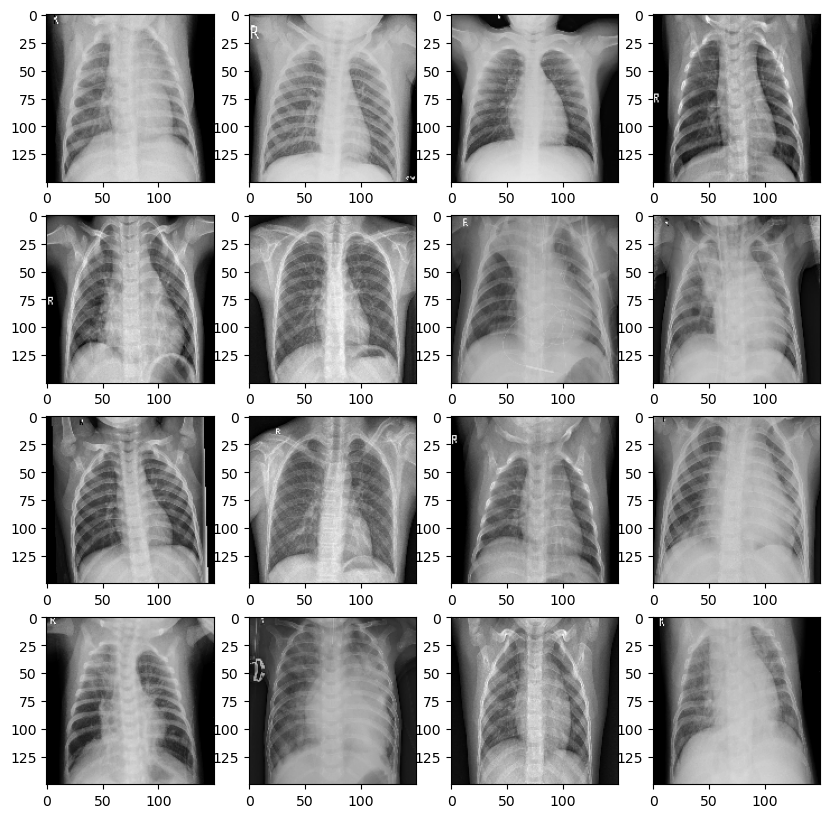

[[0.8989668 ]
 [0.4756582 ]
 [0.1987762 ]
 [0.3030884 ]
 [0.88365394]
 [0.21759178]
 [0.96788156]
 [0.99756444]
 [0.16096158]
 [0.17689958]
 [0.28272697]
 [0.9974112 ]
 [0.86697257]
 [0.9998575 ]
 [0.38766226]
 [0.99704236]]


In [95]:
# 9.1 Make predictions
results = model.predict(images[0])

# 9.2 Plot the images and check with
#     results
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.figure(figsize= (10,10))
for i in range(results.shape[0]):
    plt.subplot(4,4,i+1)
    _=imshow(images[0][i]) ;

plt.show() ;
# 9.3 Predicted labels
print(results)         # Probability values
                       # > 0.5 is Dog